C:\Users\Jaya Pradeepa\AppData\Local\Temp\ipykernel_21484\664920142.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start='2020-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


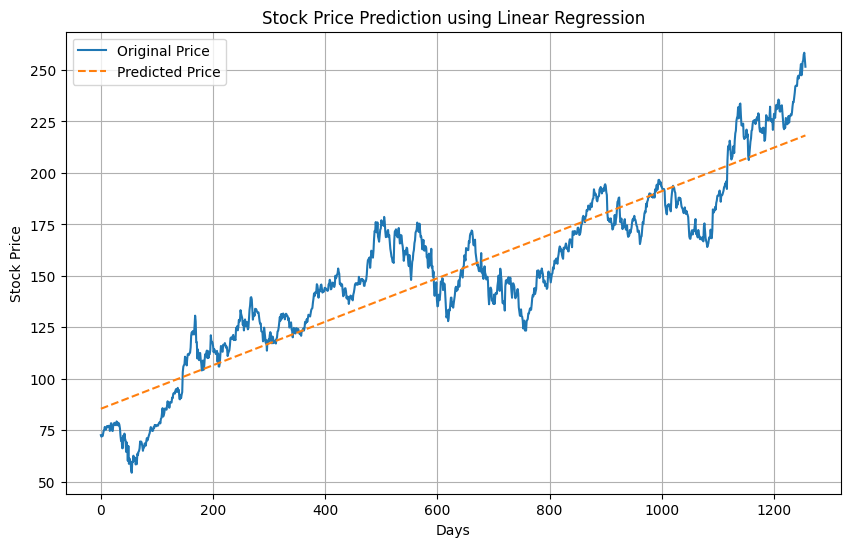

In [1]:
# Step 1: Install yfinance (only once)
!pip install yfinance

# Step 2: Import libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Step 3: Download historical stock data
# You can change 'AAPL' to 'RELIANCE.NS' or 'TCS.NS' for Indian stocks
data = yf.download('AAPL', start='2020-01-01', end='2024-12-31')

# Step 4: Use only the 'Close' price
data = data[['Close']]
data.reset_index(inplace=True)

# Step 5: Prepare the data for training
data['Days'] = np.arange(len(data))
X = data['Days'].values.reshape(-1, 1)  # Independent variable (number of days)
y = data['Close'].values.reshape(-1, 1)  # Dependent variable (stock price)

# Step 6: Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Step 7: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 8: Predict stock prices using the model
predicted = model.predict(X)

# Step 9: Plot original vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y, label='Original Price')
plt.plot(predicted, label='Predicted Price', linestyle='--')
plt.title('Stock Price Prediction using Linear Regression')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.savefig("stock_prediction.png")  # Saves the graph as a PNG image
plt.show()

